## **Using all the Regressors with Advertising Dataset**



In [1]:
# Importing the libraries
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sb
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold
from sklearn.model_selection import GridSearchCV
from sklearn.pipeline import make_pipeline
from sklearn import model_selection
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso
from sklearn.linear_model import ElasticNet

In [2]:
# Mount the Google Drive
#from google.colab import drive
#drive.mount('/content/gdrive')

In [3]:
# Importing the dataset
#dataset = pd.read_csv('gdrive/My Drive/RRCE-Internship-Demo-Projects/01-Advertising/Data-Files/Train_Advertising_Data_preprocessed.csv')
dataset = pd.read_csv('C:/MDemo/PROF/Profit-Prediction-Project-in-Anaconda-Files/Data-Files/Train_Advertising_Data_Preprocessed.csv')
print(dataset.shape)
dataset.head()

(150, 4)


,TV,Radio,Newspaper,Sales
0,1.010016,0.899390,1.654765,22.1
1,-1.154338,1.001414,0.576349,10.4
2,-1.472694,1.450315,1.659240,9.3
3,0.093431,1.137444,1.175966,18.5
4,0.435110,-0.937026,1.171491,12.9


In [4]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   TV         150 non-null    float64
 1   Radio      150 non-null    float64
 2   Newspaper  150 non-null    float64
 3   Sales      150 non-null    float64
dtypes: float64(4)
memory usage: 4.8 KB


In [5]:
X=dataset.drop(['Sales'], axis=1)
y=dataset['Sales']
X[:5]

,TV,Radio,Newspaper
0,1.010016,0.899390,1.654765
1,-1.154338,1.001414,0.576349
2,-1.472694,1.450315,1.659240
3,0.093431,1.137444,1.175966
4,0.435110,-0.937026,1.171491


In [6]:
y[:5]

0    22.1
1    10.4
2     9.3
3    18.5
4    12.9
Name: Sales, dtype: float64

In [7]:
# Splitting the dataset into the Training set and Test set
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)
print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)

(120, 3)
(120,)
(30, 3)
(30,)


##**1) Linear Regressor (LR)**

In [8]:
# Fitting Multiple Linear Regression to the Training set
from sklearn.linear_model import LinearRegression
LR = LinearRegression()
model=LR.fit(X_train, y_train)

In [9]:
# Calculate the accuracy of learning by the Algorithm
LR.score(X_train,y_train)

0.8915203690885857

In [10]:
# Predicting the Test set results
y_pred = LR.predict(X_test)

In [11]:
# Calcualte the accuracy of prediction (y_test Vs y_pred) # This measure is part of Model Evaluation
r2_score(y_test, y_pred)

0.8830242952854738

In [12]:
# Calculate the Model Error (RMSE) # This measure is also part of Model Evaluation
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
rmse

1.4540215250740693

In [13]:
LR_Training_Acc= LR.score(X_train,y_train)
LR_Testing_Acc = r2_score(y_test,y_pred)

In [14]:
print("Training Accuracy :", LR_Training_Acc)
print("Testing Accuracy :", LR_Testing_Acc)

Training Accuracy : 0.8915203690885857
Testing Accuracy : 0.8830242952854738


In [15]:
New_prediction1 = LR.predict(X_train)
print(New_prediction1[:5])

[21.09701206 20.89043966 17.20985301  6.58662711  8.30249121]


In [16]:
LR_Training_Err= np.sqrt(mean_squared_error(y_train,New_prediction1))
LR_Testing_Err = np.sqrt(mean_squared_error(y_test, y_pred))

In [17]:
print("Training Error :", LR_Training_Err)
print("Testing Error :", LR_Testing_Err)

Training Error : 1.7529307537068601
Testing Error : 1.4540215250740693


In [18]:
# k-fold CV
#lm = LinearRegression()
scores1 = cross_val_score(LR, X, y, scoring='r2', cv=5)
print(scores1)
LR_CV_Average=np.average(scores1)
LR_CV_Average

[0.87022483 0.90599214 0.8973741  0.93259674 0.81007102]


0.8832517659505484

##**2) Random Forest Regressor (RFR)**

In [19]:
from sklearn.ensemble import RandomForestRegressor
RFR = RandomForestRegressor(n_estimators=100, random_state=0)
RFR.fit(X_train, y_train)

RandomForestRegressor(random_state=0)

In [20]:
# Calculate the accuracy of learning by the Algorithm
RFR.score(X_train,y_train)

0.9944312150673891

In [21]:
# Predicting the Test set results
RFR_y_pred = RFR.predict(X_test)
print(y_test)
print()
print(RFR_y_pred)

114    14.6
62     15.7
33     17.4
107     8.7
7      13.2
100    11.7
40     16.6
86     12.0
76      6.9
71     12.4
134    10.8
51     10.7
73     11.0
54     20.2
63     14.0
37     14.7
78      5.3
90     11.2
45     14.9
16     12.5
121     7.0
66      9.5
24      9.7
8       4.8
126     6.6
22      5.6
44      8.5
97     15.5
93     22.2
26     15.0
Name: Sales, dtype: float64

[12.624 14.877 15.987  9.292 13.291 12.435 15.759 11.601  7.474 11.808
 11.208 10.077 12.04  20.069 11.664 12.873  5.371 11.852 15.115 12.561
  7.579  8.21   9.962  5.47   6.353  6.437  8.256 14.866 22.564 16.53 ]


In [22]:
RFR_Training_Acc = RFR.score(X_train,y_train)
RFR_Testing_Acc = r2_score(y_test,RFR_y_pred)

In [23]:
print("Training Accuracy :", RFR_Training_Acc)
print("Testing Accuracy :", RFR_Testing_Acc)

Training Accuracy : 0.9944312150673891
Testing Accuracy : 0.9517428614638002


In [24]:
RFR_Train_Prediction = RFR.predict(X_train)
print(RFR_Train_Prediction[:5])

[20.593 21.876 15.745  9.028  5.421]


In [25]:
RFR_Training_Err = np.sqrt(mean_squared_error(y_train,RFR_Train_Prediction))
RFR_Testing_Err = np.sqrt(mean_squared_error(y_test, RFR_y_pred))

In [26]:
print("Training Error :", RFR_Training_Err)
print("Testing Error :", RFR_Testing_Err)

Training Error : 0.397164921663532
Testing Error : 0.9339073294497705


In [27]:
# k-fold CV
RFR_scores = cross_val_score(RFR, X, y, scoring='r2', cv=5)
print(RFR_scores)
RFR_CV_Average=np.average(RFR_scores)
RFR_CV_Average

[0.97878246 0.97567645 0.95019759 0.96937039 0.96150501]


0.9671063809974021

##**3) Decision Trees Regressor (DTR)**

In [28]:
from sklearn.tree import DecisionTreeRegressor
#DecisionTreeRegressor class has many parameters. Input only random_state=0 or 42.
DTR = DecisionTreeRegressor(random_state=0)
#Fit the regressor object to the dataset.
DTR.fit(X_train,y_train)

DecisionTreeRegressor(random_state=0)

In [29]:
DTR_y_pred = DTR.predict(X_test)
print(y_test)
print()
print(DTR_y_pred)

114    14.6
62     15.7
33     17.4
107     8.7
7      13.2
100    11.7
40     16.6
86     12.0
76      6.9
71     12.4
134    10.8
51     10.7
73     11.0
54     20.2
63     14.0
37     14.7
78      5.3
90     11.2
45     14.9
16     12.5
121     7.0
66      9.5
24      9.7
8       4.8
126     6.6
22      5.6
44      8.5
97     15.5
93     22.2
26     15.0
Name: Sales, dtype: float64

[13.6 15.5 15.9  8.8 13.2 12.3 15.5 11.8  6.6 12.2 10.9  9.7 12.2 19.8
 11.8 13.6  5.5 11.  14.7 12.6  7.3  9.5  8.6  5.7  7.2  5.3  8.8 14.7
 23.8 16.9]


In [30]:
DTR_Training_Acc = DTR.score(X_train,y_train)
DTR_Testing_Acc = r2_score(y_test,DTR_y_pred)

In [31]:
print("Training Accuracy :", DTR_Training_Acc)
print("Testing Accuracy :", DTR_Testing_Acc)

Training Accuracy : 1.0
Testing Accuracy : 0.9570461365191448


In [32]:
DTR_Train_Prediction = DTR.predict(X_train)
print(DTR_Train_Prediction[:5])

[20.8 21.7 15.9  8.8  5.7]


In [33]:
DTR_Training_Err = np.sqrt(mean_squared_error(y_train,DTR_Train_Prediction))
DTR_Testing_Err = np.sqrt(mean_squared_error(y_test, DTR_y_pred))

In [34]:
print("Training Error :", DTR_Training_Err)
print("Testing Error :", DTR_Testing_Err)

Training Error : 0.0
Testing Error : 0.8810978000956154


In [35]:
# k-fold CV
#lm = LinearRegression()
DTR_scores = cross_val_score(DTR, X, y, scoring='r2', cv=5)
print(DTR_scores)
DTR_CV_Average=np.average(DTR_scores)
DTR_CV_Average

[0.92447153 0.96931274 0.92986001 0.92724852 0.91489034]


0.9331566277391463

##**4) Support Vector Regressor**

In [36]:
from sklearn.svm import SVR
SVR = SVR()
#SVR_regressor.fit(X_train.reshape(-1,1), y_train.reshape(-1,1))
SVR.fit(X_train, y_train)

SVR()

In [37]:
SVR_y_pred = SVR.predict(X_test)
print(y_test)
print()
print(SVR_y_pred)

114    14.6
62     15.7
33     17.4
107     8.7
7      13.2
100    11.7
40     16.6
86     12.0
76      6.9
71     12.4
134    10.8
51     10.7
73     11.0
54     20.2
63     14.0
37     14.7
78      5.3
90     11.2
45     14.9
16     12.5
121     7.0
66      9.5
24      9.7
8       4.8
126     6.6
22      5.6
44      8.5
97     15.5
93     22.2
26     15.0
Name: Sales, dtype: float64

[14.27093931 15.05459666 16.81557359  9.33604893 12.76375045 12.59881211
 16.22512469 11.65326475  8.71582666 11.32366123 11.40969197 10.67059183
 10.67848354 19.59568732 13.39028902 14.48668662  9.50627156 10.64431085
 15.36472295 13.67220529  9.98442914 10.16023071  9.54041238  9.74513109
 10.43043834  9.92572042  9.85577412 15.50123217 20.79080874 15.6765277 ]


In [38]:
SVR_Training_Acc = SVR.score(X_train,y_train)
SVR_Testing_Acc = r2_score(y_test,SVR_y_pred)

In [39]:
print("Training Accuracy :", SVR_Training_Acc)
print("Testing Accuracy :", SVR_Testing_Acc)

Training Accuracy : 0.9098530289575183
Testing Accuracy : 0.8168165913616942


In [40]:
SVR_Train_Prediction = SVR.predict(X_train)
print(SVR_Train_Prediction[:5])

[19.57423363 22.0395244  15.51544427  9.32986657  9.84206444]


In [41]:
SVR_Training_Err = np.sqrt(mean_squared_error(y_train, SVR_Train_Prediction))
SVR_Testing_Err = np.sqrt(mean_squared_error(y_test, SVR_y_pred))

In [42]:
print("Training Error :", SVR_Training_Err)
print("Testing Error :", SVR_Testing_Err)

Training Error : 1.5979612015277487
Testing Error : 1.8195586913373583


In [43]:
# k-fold CV
#lm = LinearRegression()
SVR_scores = cross_val_score(SVR, X, y, scoring='r2', cv=5)
print(SVR_scores)
SVR_CV_Average=np.average(SVR_scores)
SVR_CV_Average

[0.86526342 0.8985658  0.93008487 0.85419636 0.78329958]


0.8662820049529729

##**5) KNN Regressor**

In [44]:
#import required packages
from sklearn import neighbors
from sklearn.metrics import mean_squared_error
from math import sqrt
import matplotlib.pyplot as plt
%matplotlib inline

In [45]:
rmse_val = [] #to store rmse values for different k
for K in range(20):
    K = K+1
    KNN_Regressor = neighbors.KNeighborsRegressor(n_neighbors = K)

    KNN_Regressor.fit(X_train, y_train)  #fit the model
    KNN_pred=KNN_Regressor.predict(X_test) #make prediction on test set
    KNN_error = sqrt(mean_squared_error(y_test,KNN_pred)) #calculate rmse
    rmse_val.append(KNN_error) #store rmse values
    print('RMSE value for k= ' , K , 'is:', KNN_error)

RMSE value for k=  1 is: 2.0031641636837128
RMSE value for k=  2 is: 1.685749091650356
RMSE value for k=  3 is: 1.6965105800283562
RMSE value for k=  4 is: 1.4293938109095992
RMSE value for k=  5 is: 1.41935666177791
RMSE value for k=  6 is: 1.4637945362804319
RMSE value for k=  7 is: 1.5076155882401727
RMSE value for k=  8 is: 1.5684702605830096
RMSE value for k=  9 is: 1.6500492572769847
RMSE value for k=  10 is: 1.7268458722962705
RMSE value for k=  11 is: 1.7534256121690674
RMSE value for k=  12 is: 1.8094754457822548
RMSE value for k=  13 is: 1.8897663777633085
RMSE value for k=  14 is: 1.9846807005141145
RMSE value for k=  15 is: 2.0460799014122006
RMSE value for k=  16 is: 2.100943488451478
RMSE value for k=  17 is: 2.088663308801042
RMSE value for k=  18 is: 2.1179278346433805
RMSE value for k=  19 is: 2.1764030827440997
RMSE value for k=  20 is: 2.244240777337999


<Axes: >

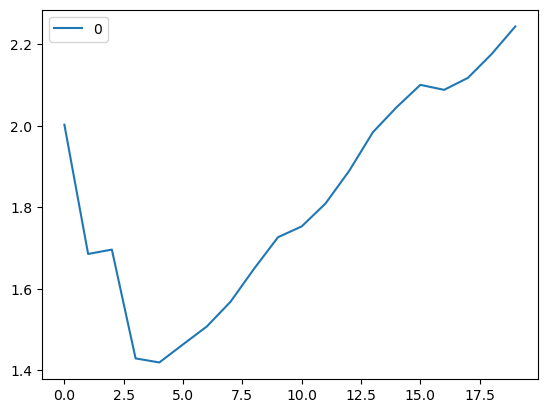

In [46]:
#plotting the rmse values against k values
curve = pd.DataFrame(rmse_val) #elbow curve
curve.plot()

In [47]:
from sklearn.neighbors import KNeighborsRegressor
KNNR = KNeighborsRegressor(n_neighbors=5)
KNNR.fit(X_train, y_train)

KNeighborsRegressor()

In [48]:
KNN1_y_pred=KNNR.predict(X_test)

In [49]:
KNN1_Training_Acc = KNNR.score(X_train,y_train)
KNN1_Testing_Acc = r2_score(y_test,KNN1_y_pred)

In [50]:
print("Training Accuracy :", KNN1_Training_Acc)
print("Testing Accuracy :", KNN1_Testing_Acc)

Training Accuracy : 0.947618086227068
Testing Accuracy : 0.8885353697739312


In [51]:
KNN1_Train_Prediction = KNNR.predict(X_train)
print(KNN1_Train_Prediction[:5])

[20.8  22.38 14.76  9.1   7.04]


In [52]:
KNN1_Training_Err = np.sqrt(mean_squared_error(y_train, KNN1_Train_Prediction))
KNN1_Testing_Err = np.sqrt(mean_squared_error(y_test, KNN1_y_pred))

In [53]:
print("Training Error :", KNN1_Training_Err)
print("Testing Error :", KNN1_Testing_Err)

Training Error : 1.2180955080233515
Testing Error : 1.41935666177791


In [54]:
# k-fold CV
#lm = LinearRegression()
KNNR_scores = cross_val_score(KNNR, X, y, scoring='r2', cv=5)
print(KNNR_scores)
KNNR_CV_Average=np.average(KNNR_scores)
DTR_CV_Average

[0.90321277 0.9540995  0.96316842 0.92992262 0.89015185]


0.9331566277391463

##**6) Ridge Regressor**

###**a) Module Tuning for Ridge Regression**

In [55]:
alphas = [0.001, 0.01, 0.1, 1, 10]
print('All errors are RMSE')
print('-'*76)
for alpha in alphas:
    # instantiate and fit model
    ridge = Ridge(alpha=alpha, fit_intercept=True, random_state=99)
    ridge.fit(X_train, y_train)
    # calculate errors
    new_train_error1 = np.sqrt(mean_squared_error(y_train, ridge.predict(X_train)))
    #new_validation_error1 = np.sqrt(mean_squared_error(y_validation, ridge.predict(X_validation)))
    new_test_error1 = np.sqrt(mean_squared_error(y_test, ridge.predict(X_test)))
    # print errors as report
    #print('alpha: {:7} | train error: {:5} | val error: {:6} | test error: {}'.
    print('alpha: {:7} | train error: {:5} | test error: {}'.
          format(alpha,
                 round(new_train_error1,3),
                 #round(new_validation_error1,3),
                 round(new_test_error1,3)))

All errors are RMSE
----------------------------------------------------------------------------
alpha:   0.001 | train error: 1.753 | test error: 1.454
alpha:    0.01 | train error: 1.753 | test error: 1.454
alpha:     0.1 | train error: 1.753 | test error: 1.453
alpha:       1 | train error: 1.753 | test error: 1.449
alpha:      10 | train error: 1.792 | test error: 1.451


###**b) Execution of Ridge Regression**

In [56]:
ridge = Ridge(alpha=10)
ridge.fit(X_train, y_train)
pred_train_ridge= ridge.predict(X_train)
Ridge_Train_Acc = r2_score(y_train, pred_train_ridge)
Ridge_Train_Err = np.sqrt(mean_squared_error(y_train,pred_train_ridge))
print("Train Error : ", np.sqrt(mean_squared_error(y_train,pred_train_ridge)))
print("Train Accuracy : ", r2_score(y_train, pred_train_ridge))
pred_test_ridge= ridge.predict(X_test)
Ridge_Test_Acc = r2_score(y_test, pred_test_ridge)
Ridge_Test_Err = np.sqrt(mean_squared_error(y_test,pred_test_ridge))
print("Test Error : ", np.sqrt(mean_squared_error(y_test,pred_test_ridge)))
print("Test Accuracy : ", r2_score(y_test, pred_test_ridge))

Train Error :  1.7919555485068404
Train Accuracy :  0.8866365269641172
Test Error :  1.4513249213032264
Test Accuracy :  0.8834577752839624


In [57]:
# k-fold CV
#lm = LinearRegression()
Ridge_scores = cross_val_score(ridge, X, y, scoring='r2', cv=5)
print(Ridge_scores)
Ridge_CV_Average=np.average(Ridge_scores)
Ridge_CV_Average

[0.86142586 0.89440089 0.89897389 0.94192563 0.79843009]


0.8790312691281917

##**7) Lasso Regressor**

###**a) Module Tuning for Lasso Regression**

In [58]:
alphas = [0.001, 0.01, 0.1, 1, 10]
print('All errors are RMSE')
print('-'*76)
for alpha in alphas:
    # instantiate and fit model
    #ridge = Ridge(alpha=alpha, fit_intercept=True, random_state=99)
    #ridge.fit(X_train, y_train)
    lasso = Lasso(alpha=alpha, fit_intercept=True, random_state=99)
    lasso.fit(X_train, y_train)
    # calculate errors
    new_train_error2 = np.sqrt(mean_squared_error(y_train, lasso.predict(X_train)))
    #new_validation_error2 = np.sqrt(mean_squared_error(y_validation, lasso.predict(X_validation)))
    new_test_error2 = np.sqrt(mean_squared_error(y_test, lasso.predict(X_test)))
    # print errors as report
    #print('alpha: {:7} | train error: {:5} | val error: {:6} | test error: {}'.
    print('alpha: {:7} | train error: {:5} | test error: {}'.
          format(alpha,
                 round(new_train_error2,3),
                 #round(new_validation_error2,3),
                 round(new_test_error2,3)))

All errors are RMSE
----------------------------------------------------------------------------
alpha:   0.001 | train error: 1.753 | test error: 1.454
alpha:    0.01 | train error: 1.753 | test error: 1.449
alpha:     0.1 | train error: 1.758 | test error: 1.422
alpha:       1 | train error: 2.219 | test error: 1.716
alpha:      10 | train error: 5.322 | test error: 5.055


###**b) Execution of Lasso Regression**

In [59]:
model_lasso = Lasso(alpha=0.1)
model_lasso.fit(X_train, y_train)
pred_train_lasso= model_lasso.predict(X_train)
Lasso_Train_Acc = r2_score(y_train, pred_train_lasso)
Lasso_Train_Err = np.sqrt(mean_squared_error(y_train,pred_train_lasso))
print("Train Error : ", np.sqrt(mean_squared_error(y_train,pred_train_lasso)))
print("Train Accuracy : ", r2_score(y_train, pred_train_lasso))

pred_test_lasso= model_lasso.predict(X_test)
Lasso_Test_Acc = r2_score(y_test, pred_test_lasso)
Lasso_Test_Err = np.sqrt(mean_squared_error(y_test,pred_test_lasso))
print("Test Error : ", np.sqrt(mean_squared_error(y_test,pred_test_lasso)))
print("Test Accuracy : ", r2_score(y_test, pred_test_lasso))

Train Error :  1.7582955769404447
Train Accuracy :  0.890855351825022
Test Error :  1.4223734008909066
Test Accuracy :  0.8880610463476449


In [60]:
# k-fold CV
#lm = LinearRegression()
Lasso_scores = cross_val_score(model_lasso, X, y, scoring='r2', cv=5)
print(Lasso_scores)
Lasso_CV_Average=np.average(Lasso_scores)
Lasso_CV_Average

[0.87306347 0.90184459 0.90045476 0.93691416 0.81548297]


0.8855519893667351

##**8) ElasticNet Regression**

###**a) Module Tuning for ElasticNet Regression**

In [61]:
alphas = [0.001, 0.01, 0.1, 1, 10]
print('All errors are RMSE')
print('-'*76)
for alpha in alphas:
    # instantiate and fit model
    #ridge = Ridge(alpha=alpha, fit_intercept=True, random_state=99)
    enet  = ElasticNet(alpha=alpha, fit_intercept=True, random_state=99)
    enet.fit(X_train, y_train)
    # calculate errors
    new_train_error3 = np.sqrt(mean_squared_error(y_train, enet.predict(X_train)))
    #new_validation_error3 = np.sqrt(mean_squared_error(y_validation, enet.predict(X_validation)))
    new_test_error3 = np.sqrt(mean_squared_error(y_test, enet.predict(X_test)))
    # print errors as report
    #print('alpha: {:7} | train error: {:5} | val error: {:6} | test error: {}'.
    print('alpha: {:7} | train error: {:5} | test error: {}'.
          format(alpha,
                 round(new_train_error3,3),
                 #round(new_validation_error3,3),
                 round(new_test_error3,3)))

All errors are RMSE
----------------------------------------------------------------------------
alpha:   0.001 | train error: 1.753 | test error: 1.453
alpha:    0.01 | train error: 1.753 | test error: 1.449
alpha:     0.1 | train error: 1.777 | test error: 1.428
alpha:       1 | train error: 2.709 | test error: 2.306
alpha:      10 | train error: 5.322 | test error: 5.055


###**b) Execution of ElasticNet Regression**

In [62]:
#Elastic Net
model_enet = ElasticNet(alpha = 0.1)
model_enet.fit(X_train, y_train)
pred_train_enet= model_enet.predict(X_train)
ElasticNet_Train_Acc = r2_score(y_train, pred_train_enet)
ElasticNet_Train_Err = np.sqrt(mean_squared_error(y_train,pred_train_enet))
print("Train Error : ", np.sqrt(mean_squared_error(y_train,pred_train_enet)))
print("Train Accuracy : ", r2_score(y_train, pred_train_enet))

pred_test_enet= model_enet.predict(X_test)
ElasticNet_Test_Acc = r2_score(y_test, pred_test_enet)
ElasticNet_Test_Err = np.sqrt(mean_squared_error(y_test,pred_test_enet))

print("Test Error : ", np.sqrt(mean_squared_error(y_test,pred_test_enet)))
print("Test Accuracy : ", r2_score(y_test, pred_test_enet))

Train Error :  1.7767460553477585
Train Accuracy :  0.8885527394071049
Test Error :  1.4284188157233626
Test Accuracy :  0.8871074915176552


In [63]:
# k-fold CV
#lm = LinearRegression()
ElasticNet_scores = cross_val_score(model_enet, X, y, scoring='r2', cv=5)
print(ElasticNet_scores)
ElasticNet_CV_Average=np.average(ElasticNet_scores)
ElasticNet_CV_Average

[0.86668748 0.89774097 0.9006907  0.94064912 0.80560903]


0.8822754588250781

In [64]:
df1 = pd.DataFrame({
    'ML Algorithm': ['Linear_Regression','Random_Forest_Regressor','Decision_Trees_Regressor','Support_Vector_Regressor', 'KNN_Regressor', 'Ridge_Regressor','Lasso_Regressor', 'ElasticNet_Regressor'],
    'Train_acc': [LR_Training_Acc, RFR_Training_Acc, DTR_Training_Acc, SVR_Training_Acc, KNN1_Training_Acc, Ridge_Train_Acc, Lasso_Train_Acc, ElasticNet_Train_Acc],
    'Test_acc': [LR_Testing_Acc, RFR_Testing_Acc, DTR_Testing_Acc, SVR_Testing_Acc, KNN1_Testing_Acc, Ridge_Test_Acc, Lasso_Test_Acc, ElasticNet_Test_Acc ],
    'Cross_Val_Score_Average': [LR_CV_Average, RFR_CV_Average, DTR_CV_Average, SVR_CV_Average, KNNR_CV_Average, Ridge_CV_Average, Lasso_CV_Average, ElasticNet_CV_Average],
    'Train_Err': [LR_Training_Err, RFR_Training_Err, DTR_Training_Err, SVR_Training_Err, KNN1_Training_Err, Ridge_Train_Err, Lasso_Train_Err, ElasticNet_Train_Err],
    'Test_Err': [LR_Testing_Err, RFR_Testing_Err, DTR_Testing_Err, SVR_Testing_Err, KNN1_Testing_Err, Ridge_Test_Err, Lasso_Test_Err, ElasticNet_Test_Err],
    #'GridSearchCV_based_acc': [lr_grid_acc_avg, bayes_grid_acc_avg, rfc_grid_acc_avg, dtc_grid_acc_avg, kNN_grid_acc_avg, svc_grid_acc_avg],
    'Suitability': ['Not Suitable', 'Suitable', 'Not Suitable', 'Not Suitable', 'Not Suitable', 'Not Suitable', 'Not Suitable', 'Not Suitable']})

df1

,ML Algorithm,Train_acc,Test_acc,Cross_Val_Score_Average,Train_Err,Test_Err,Suitability
0,Linear_Regression,0.891520,0.883024,0.883252,1.752931,1.454022,Not Suitable
1,Random_Forest_Regressor,0.994431,0.951743,0.967106,0.397165,0.933907,Suitable
2,Decision_Trees_Regressor,1.000000,0.957046,0.933157,0.000000,0.881098,Not Suitable
3,Support_Vector_Regressor,0.909853,0.816817,0.866282,1.597961,1.819559,Not Suitable
4,KNN_Regressor,0.947618,0.888535,0.928111,1.218096,1.419357,Not Suitable
5,Ridge_Regressor,0.886637,0.883458,0.879031,1.791956,1.451325,Not Suitable
6,Lasso_Regressor,0.890855,0.888061,0.885552,1.758296,1.422373,Not Suitable
7,ElasticNet_Regressor,0.888553,0.887107,0.882275,1.776746,1.428419,Not Suitable
